# **Econ 206 Problem Set 2 Coding Part**

## Normal/strategic form matrix game

**A public good game with 2 players**

A public goods game is a type of game theory scenario where individuals must choose whether or not to contribute resources (e.g., time, money, effort) to a common pool or public good. The benefits of the public good are shared among all individuals, regardless of whether they contributed or not. This creates a dilemma where individuals face a trade-off between their own self-interest and the collective interest of the group.
f
My game is a 2 players public good game where Player A and Player B have an endowment k initially. They can choose to contribute (they can also choose how much they want to contribute as long as the amount is less than k) to the public pool or keep the endowment for themselves. The amount in the public pool will be multiplied by a multiplier m and equally divided to the two players.

The formular of the payoff metrix is shown below. In this matrix, the rows represent A's decision and the columns represent B's decision. The numbers in each cell represent the payoffs for A and B, respectively. For example, the top-left cell represents the scenario where both A and B keep their k for themselves. In this case, A and B both receive a payoff of k.

The other cells in the matrix represent scenarios where one or both players contribute to the public pool. For example, if A contributes a to the pool and B keeps all his k for himself, Player A's payoff will abstract the contribution a and added by the distributio a * m/2, which is k-a+a * m/2, while Player B get addition only. 





 Payoff metrix    | B keeps k                |B contributes b|
---------------------|--------------------------|---------------|
**A keeps k**        | k, k                | k + b * m/2, k - b+b * m/2|
**A contributes a**  | k-a+a * m/2, k + a * m/2 |k-a+((a+b) * m)/2, k-b+((a+b) * m)/2|


---

Assign the a and b are the amount that they are willing to give to the public. a and b are from 0 to 10, which means the Player A and Player B can choose 0 to 10 to contribute to the public. In this case, I set the m as 4 (you can change it!) and save the all Nash equilibrium result.


In [ ]:
!pip install nashpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nashpy as nash
import numpy as np
import pandas as pd

index = []
res = []
k = 10
for a in range(k+1):
  for b in range(k+1):
    m = 4
    A = np.array([[k-a+((a+b)*m)/2, k -a+a*m/2], 
                  [k + b*m/2, k]])
    B = np.array([[k-b+((a+b)*m)/2, k + a*m/2], 
                  [k - b+b*m/2, k]])
    public_good_game = nash.Game(A, B)
    equilibria = public_good_game.vertex_enumeration()
    index.append([a,b])
    for eq in equilibria:
      sigma_r = eq[0]
      sigma_c = eq[1]
      res.append([public_good_game[sigma_r, sigma_c],[a,b]])
data = {'Player A': [x[0][0] for x in res], 
        'Player B': [x[0][1] for x in res], 
        'a': [x[1][0] for x in res], 
        'b': [x[1][1] for x in res]}

df = pd.DataFrame(data)

Here I draw the 3D figure to see the rules. 


The x-axis and y-axis are the value of a and b (from 0 to 10). The z-axis is the payoff of Player A and the color represents the Player B's payoff. You can see from the color bar the the lighter color means the higher payoff for Player B, and the higher the z-axis means the higher payoff ofr Player A. Thus, it is obvious that the best result for both of them is when a = b = 10, where they both get payoff 40!


In [ ]:
import plotly.express as px
 
fig = px.scatter_3d(df, x = 'a', 
                    y = 'b', z = 'Player A',
                    color = 'Player B')
  
fig.show()

I also show the result directly. The best result for both Player A and Player B is they contribute all the money to the public. 

In [ ]:
equilibria = public_good_game.vertex_enumeration()
for eq in equilibria:
    print(eq)

(array([1., 0.]), array([1., 0.]))


To check whether this is right, I use is_best_response function

In [ ]:
sigma_r = np.array([1, 0])
sigma_c = np.array([1, 0])
public_good_game.is_best_response(sigma_r, sigma_c)

(True, True)

The best payoffs for them are 40 and 40

In [ ]:
public_good_game[sigma_r, sigma_c]

array([40., 40.])

**Conclusion and Discussion**



And if we go back to that 3D picture, we'll see that Nash equilibrium is changing as a and b change. When viewed from the x-axis, the result appears as a parallelogram. On the diagonal, the bigger the payoff of Player A, the darker the circle, which means that the payoff of Player B is decreasing. This just reflects a dilemma: only when two people jointly choose to contribute, both parties benefit the most; when one person wants to contribute, the other's benefit is smaller than that of the free rider. So both people want to be free rider, but their mutual benefit is minimal.

# A extensive form game

**The ultimatum game**

I introduce the ultimatum game. The game involves two players, a proposer and a responder, who is presented with a sum of money (say, \$6). The proposer must offer a division of the money between themselves and the responder (for example, \$4 to the proposer and $2 to the responder). The responder can then choose to accept or reject the offer. If the responder accepts, the money is divided as proposed. If the responder rejects, neither player receives any money.

On the surface, the game seems to favor the proposer, who can offer the responder a minimal amount and still receive a benefit. The responders can tend to reject unfair offers, even when this means they receive nothing.

Here is the game tree generated by game theory explorer (http://app.test.logos.bg/). First the proposer offer the red number to the responder, if the responder agrees, they will have corresponding money; if the responder refuses, they both get 0.

In this game, I set the bonus to be 2 and ask proposer to give a offer to responder (only in integer). Thus, proposer has 3 choices, which is ofer 0, 1, or 2. Then the responder gives the answer whether it accept (A) or reject (R) the offer.

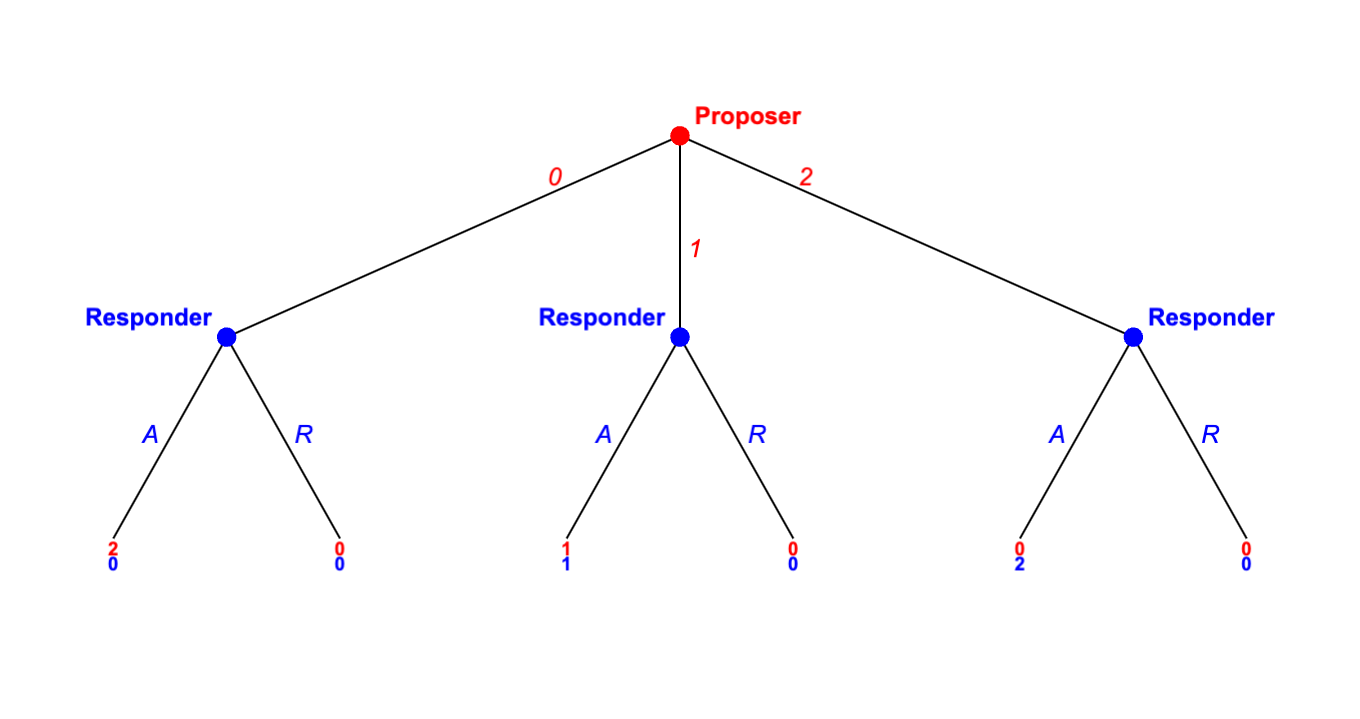

Here is the strategic form of this game.
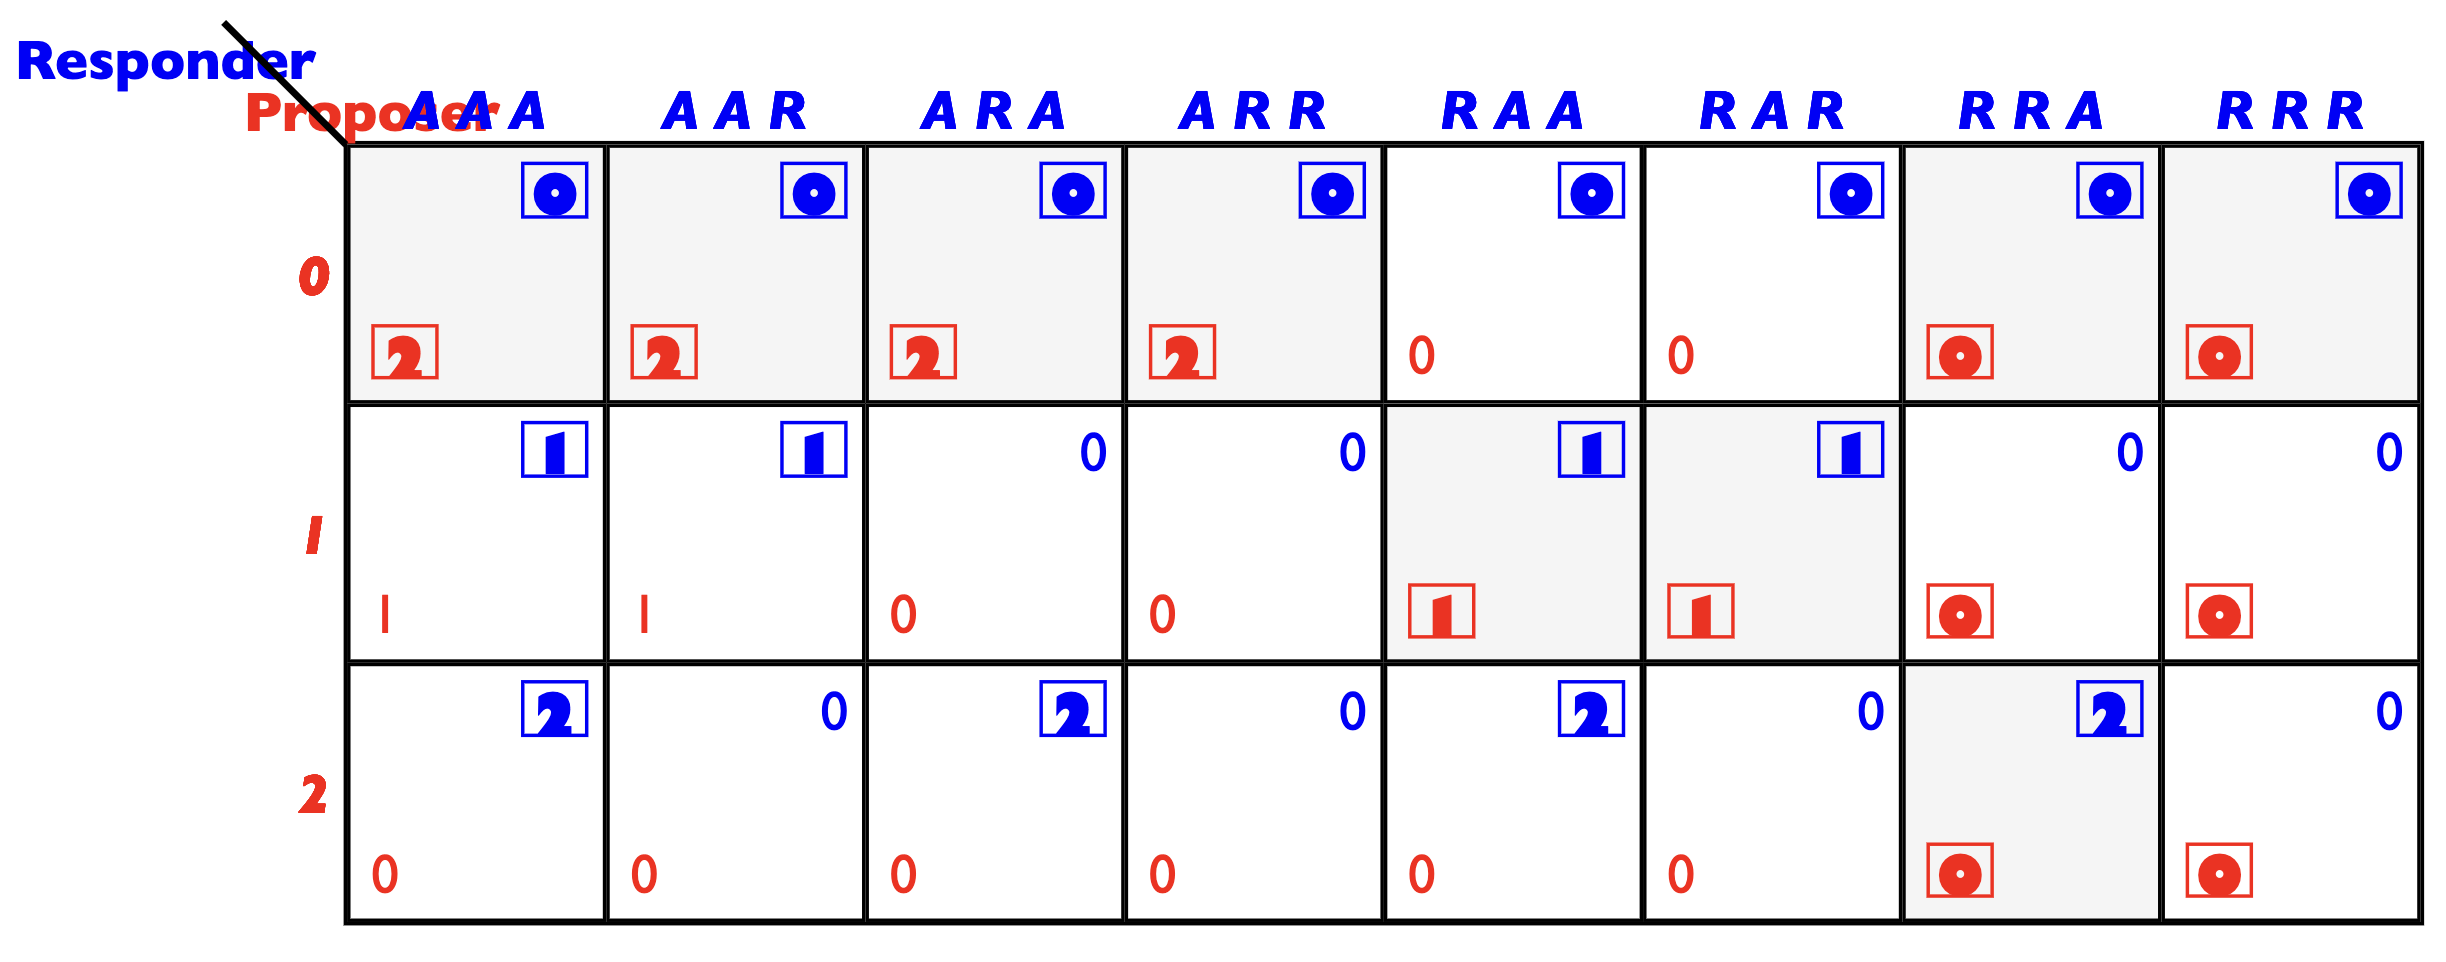
---

This is the SPNE solution
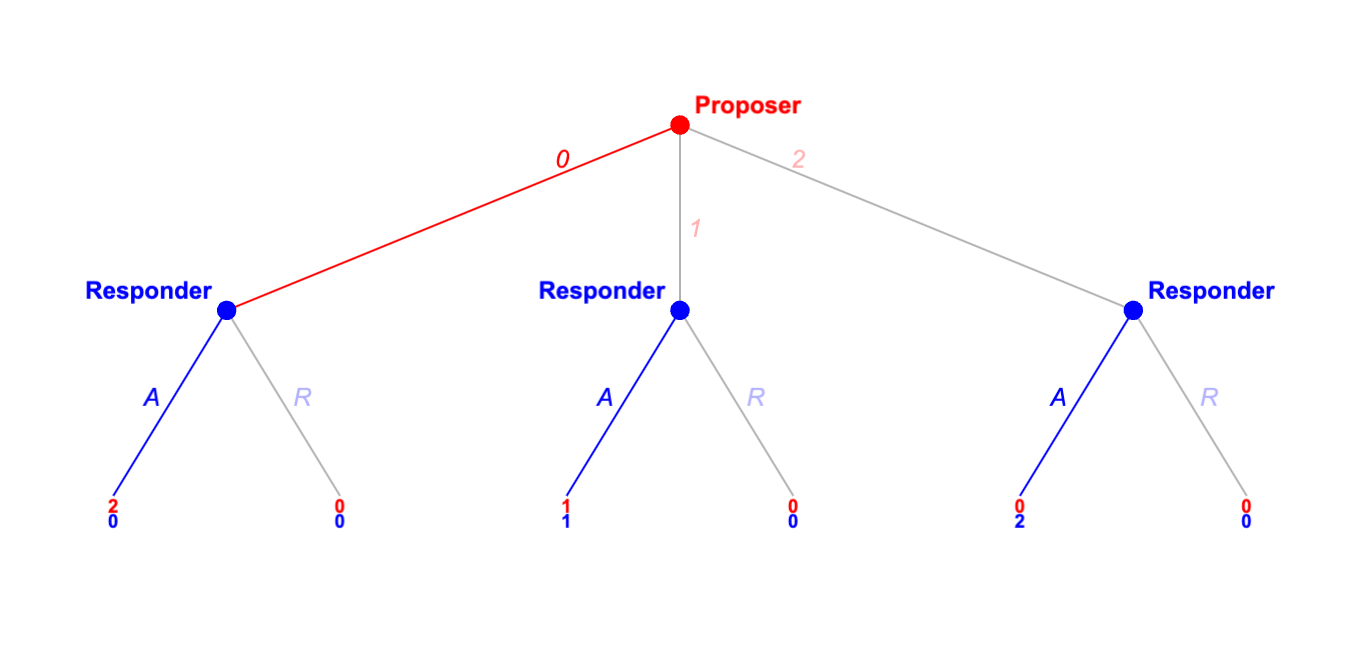

**Conclusion and Discussion**

From the strategic form and the SPNE solution figure, we can find a strange thing that is they have inconsistent results. In the strategic form, the payoff of NE are (2, 0), (0, 0), (1, 1), (0, 2). However, in the SPNE figure, the results are (2, 0), (1, 1) (0, 2). The (0, 0) is missed. This is because the error of the program that it calculate the SPNE not right. In the most left node of Responder, both (2, 0) and (0, 0) should be the SPNE for responder, but the program only give (2, 0). It makes no difference if the responder chooses to accept or reject a proposer who gives an offer 0, but if it has the other mentality: I don't get it so you don't get it too, the responder chooses to accept.

This game may seem like a first-hand advantage, but in practice, when a proposer makes an unfair or unsatisfactory offer to the responder, both parties will lose, taking into account psychological reasons.